# SAT

In [1]:
!pip3 install z3-solver

You should consider upgrading via the 'C:\Users\aless\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [8]:
from itertools import combinations
import math
import time
import os
from tqdm import tqdm
import numpy as np
import sys

base_dir = os.path.dirname(os.path.dirname((os.path.abspath('utils'))))
print(base_dir)
sys.path.append(base_dir)
import VLSISolver
import sat_utils
import utils

In [10]:
utils.load_stats

AttributeError: module 'utils' has no attribute 'load_stats'

In [9]:
OVERRIDE = True

INTERRUPT = True
PRINT = False

## Solve problems

In [4]:
NUMBER_OF_INSTANCES = 40
TIME_AVAILABLE = 300

In [5]:
def solve(rotation, symmetry_breaking, encoding_type):

    NAME = ('rot_' if rotation else 'not_rot_') + ('sb_' if symmetry_breaking else 'not_sb_') + encoding_type

    OUT_DIRECTORY_PATH = '../out/' + NAME + '/'
    IMG_DIRECTORY_PATH = '../img/' + NAME + '/'
    STATS_PATH = '../stats/' + NAME + '.csv'

    os.makedirs(OUT_DIRECTORY_PATH, exist_ok=True)
    os.makedirs(IMG_DIRECTORY_PATH, exist_ok=True)
    
    for i in range(NUMBER_OF_INSTANCES):

        OUT_FILE_PATH = OUT_DIRECTORY_PATH + str(i+1) + '.txt'
        IMG_FILE_PATH = IMG_DIRECTORY_PATH + str(i+1) + '.jpg'
        
        if PRINT:
            print(f'Instance number: {str(i)}')

        stats = utils.load_stats(STATS_PATH)
        if i not in stats.index or OVERRIDE:

            print('- Computing solution...')
            # Load instance
            plate_width, n_chips, chips_widths, chips_heights = utils.load_data(i + 1)

            # Solve instance
            vlsi_solver = VLSISolver(plate_width, 
                                    n_chips, 
                                    chips_widths, 
                                    chips_heights, 
                                    rotation = rotation, 
                                    symmetry_breaking = symmetry_breaking,
                                    encoding_type=encoding_type,
                                    time_available = TIME_AVAILABLE,
                                    interrupt = INTERRUPT)
            is_solved = vlsi_solver.solve()
            
            # Print results
            if PRINT:
                print(f'-- Problem solved? {is_solved}')
                print(f'-- Time required: {vlsi_solver.solving_time} seconds')

            if is_solved:

                # Evaluate the solution
                pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height, solving_time = vlsi_solver.evalutate()
                
                # Print solution
                if PRINT:
                    utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height)
                
                # Save results
                utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height, IMG_FILE_PATH)
                utils.write_sol(OUT_FILE_PATH, 
                                plate_width, 
                                plate_height, 
                                n_chips, 
                                chips_widths, 
                                chips_heights, 
                                pos_x, 
                                pos_y)
                utils.write_stat_line(STATS_PATH, 
                                      i + 1, 
                                      solving_time)
            
            else:
                utils.write_time_exceeded(OUT_FILE_PATH)
                utils.write_stat_line(STATS_PATH,
                                    i + 1,
                                    TIME_AVAILABLE)


        else:
            if PRINT:
                print('- Loading solution...')

            # Load results
            try:
                plate_width, plate_height, n_chips, chips_w_a, chips_h_a, pos_x, pos_y = utils.load_sol(OUT_FILE_PATH)
                stats = utils.load_stats(STATS_PATH)
            
                # Print result
                if PRINT:
                    print(f'-- Time required: {stats.at[i, "time"]} seconds')
                
                # Print solution
                if PRINT:
                    utils.plot_device(pos_x, pos_y, chips_w_a, chips_h_a, plate_width, plate_height)
            except OSError:
                print(f'-- Time exceeded!')
                
            
    utils.display_times(STATS_PATH)     
    return STATS_PATH       

            

### Let's find out which is the best encoder

In [6]:
csv_without_rotation_paths = []
csv_without_rotation_paths.append(solve(False, False, 'np'))
csv_without_rotation_paths.append(solve(False, False, 'he'))
utils.display_times_comparison(csv_without_rotation_paths, ['NP encoder', 'HE encoder', 'Unsolved'], NUMBER_OF_INSTANCES)

AttributeError: module 'utils' has no attribute 'load_stats'

In [ ]:
BEST_ENCODER = 

### Without rotation

In [ ]:
csv_without_rotation_paths = []

#### Without symmetry breaking

Instance number: 0
- Computing solution...
-- Problem solved? True
-- Time required: 0.21325087547302246 seconds


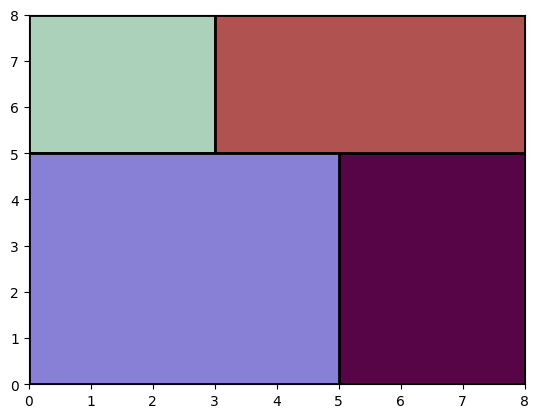

Instance number: 1
- Computing solution...
-- Problem solved? True
-- Time required: 0.395294189453125 seconds


<Figure size 640x480 with 0 Axes>

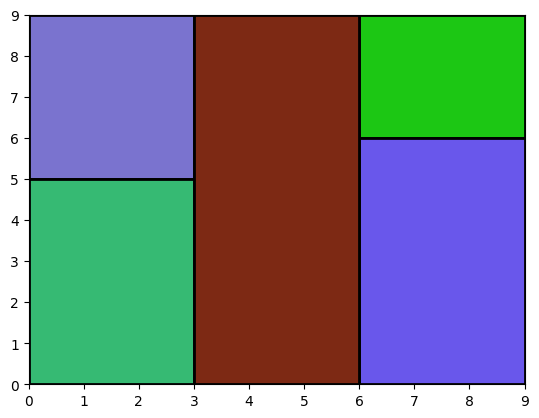

Instance number: 2
- Computing solution...
-- Problem solved? True
-- Time required: 0.6036074161529541 seconds


<Figure size 640x480 with 0 Axes>

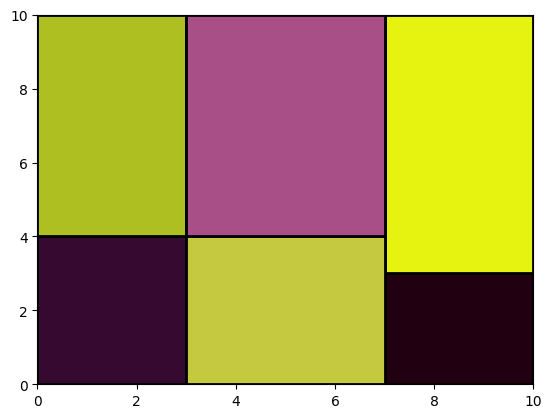

Instance number: 3
- Computing solution...
-- Problem solved? True
-- Time required: 1.0016522407531738 seconds


<Figure size 640x480 with 0 Axes>

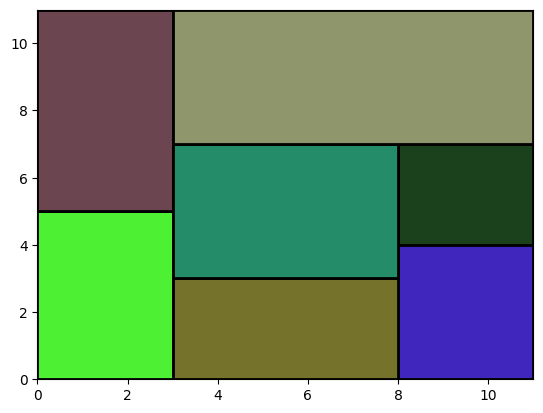

Instance number: 4
- Computing solution...
-- Problem solved? True
-- Time required: 1.621239185333252 seconds


<Figure size 640x480 with 0 Axes>

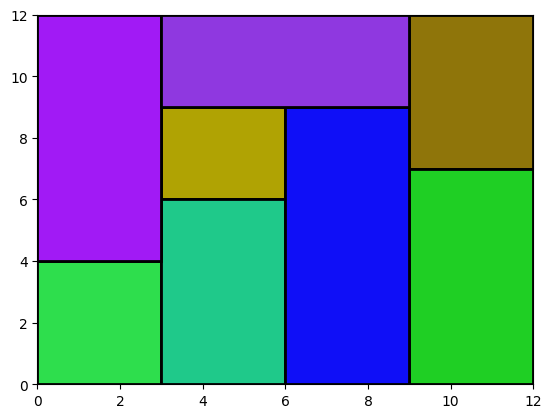

Instance number: 5
- Computing solution...
-- Problem solved? True
-- Time required: 1.870887041091919 seconds


<Figure size 640x480 with 0 Axes>

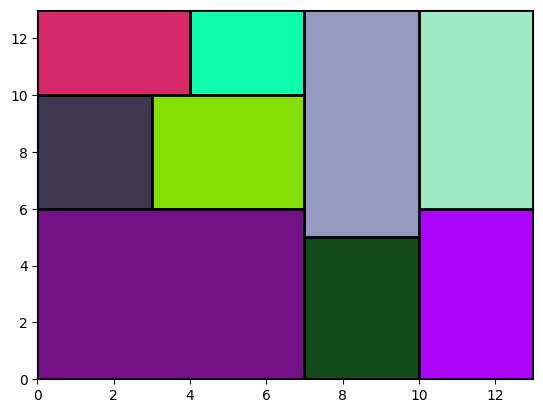

Instance number: 6
- Computing solution...
-- Problem solved? True
-- Time required: 2.389179229736328 seconds


<Figure size 640x480 with 0 Axes>

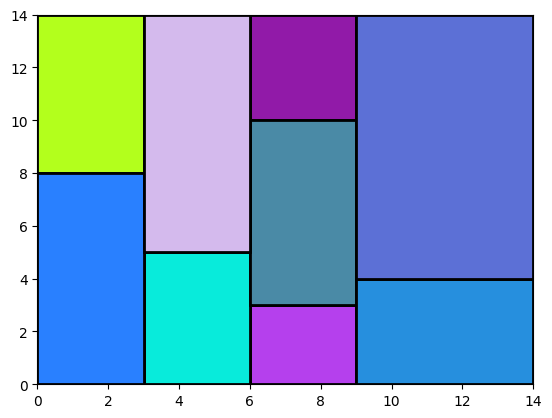

<Figure size 640x480 with 0 Axes>

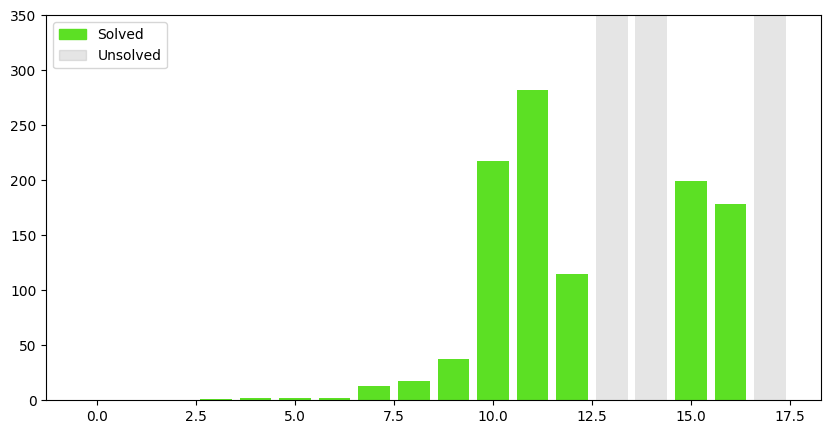

In [ ]:
ROTATION = False
SYMMETRY_BREAKING = False

csv_without_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

#### With symmetry breaking

Instance number: 0
- Computing solution...
-- Problem solved? True
-- Time required: 3.5081393718719482 seconds


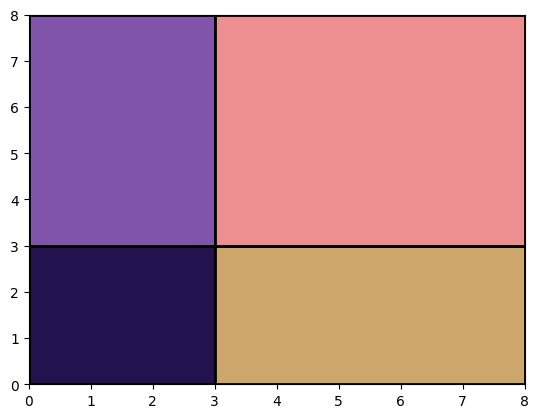

Instance number: 1
- Computing solution...
-- Problem solved? True
-- Time required: 7.039322137832642 seconds


<Figure size 640x480 with 0 Axes>

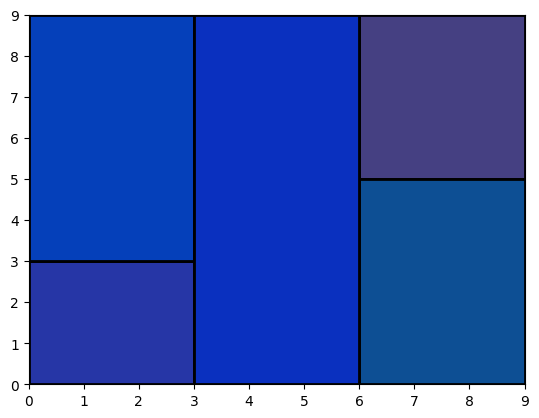

Instance number: 2
- Computing solution...
-- Problem solved? True
-- Time required: 23.192665100097656 seconds


<Figure size 640x480 with 0 Axes>

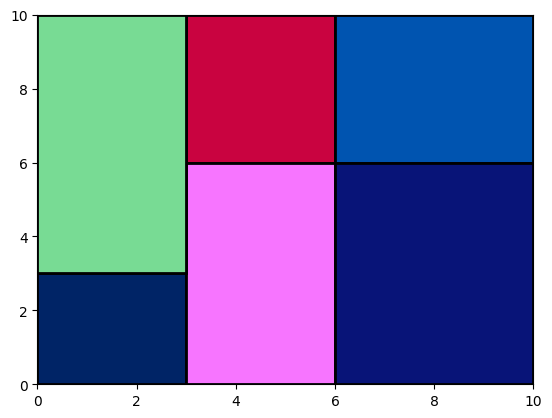

Instance number: 3
- Computing solution...
-- Problem solved? True
-- Time required: 43.0926673412323 seconds


<Figure size 640x480 with 0 Axes>

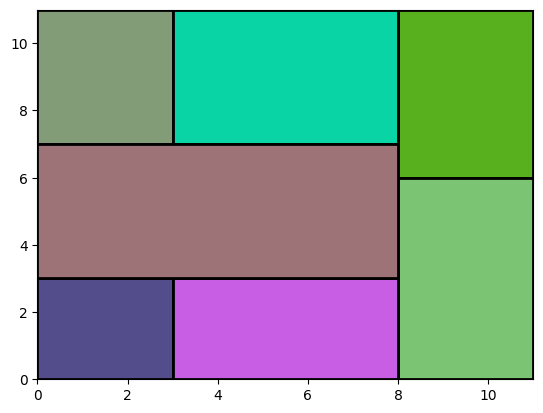

Instance number: 4
- Computing solution...
-- Problem solved? True
-- Time required: 67.26620554924011 seconds


<Figure size 640x480 with 0 Axes>

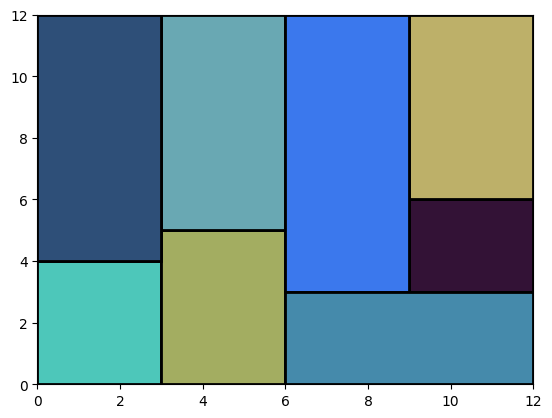

Instance number: 5
- Computing solution...
-- Problem solved? True
-- Time required: 101.59386730194092 seconds


<Figure size 640x480 with 0 Axes>

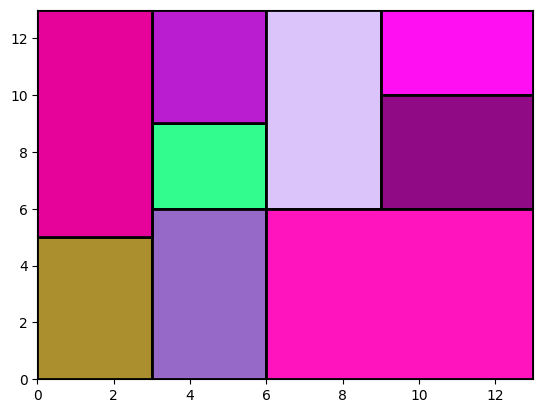

Instance number: 6
- Computing solution...
-- Problem solved? True
-- Time required: 68.09543633460999 seconds


<Figure size 640x480 with 0 Axes>

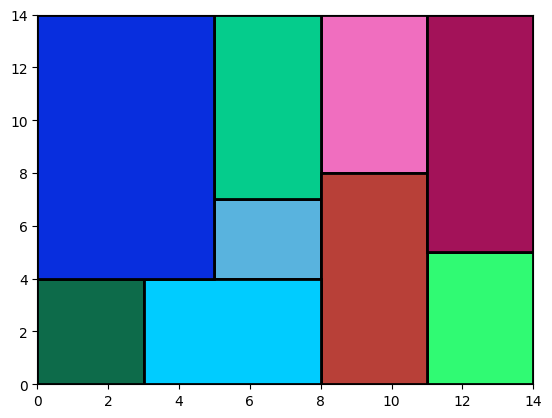

<Figure size 640x480 with 0 Axes>

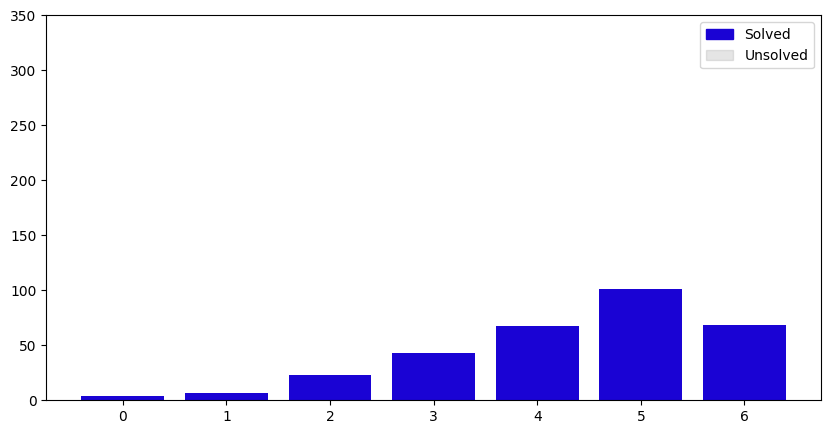

In [ ]:
ROTATION = False
SYMMETRY_BREAKING = True

csv_without_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

#### Comparison

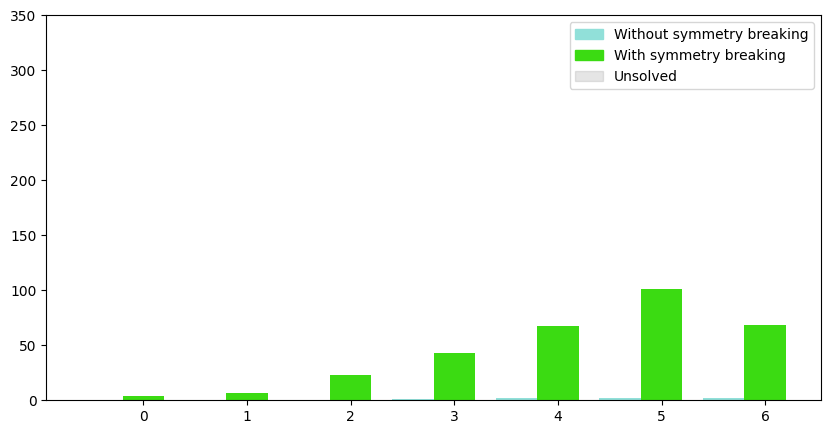

In [ ]:
utils.display_times_comparison(csv_without_rotation_paths, ['Without symmetry breaking', 'With symmetry breaking', 'Unsolved'], NUMBER_OF_INSTANCES)

### With rotation

In [ ]:
csv_with_rotation_paths = []

#### Without symmetry breaking

In [ ]:
ROTATION = True
SYMMETRY_BREAKING = False

csv_with_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

Instance number: 0
- Computing solution...


TypeError: unsupported operand type(s) for +: 'BoolRef' and 'list'

#### With symmetry breaking

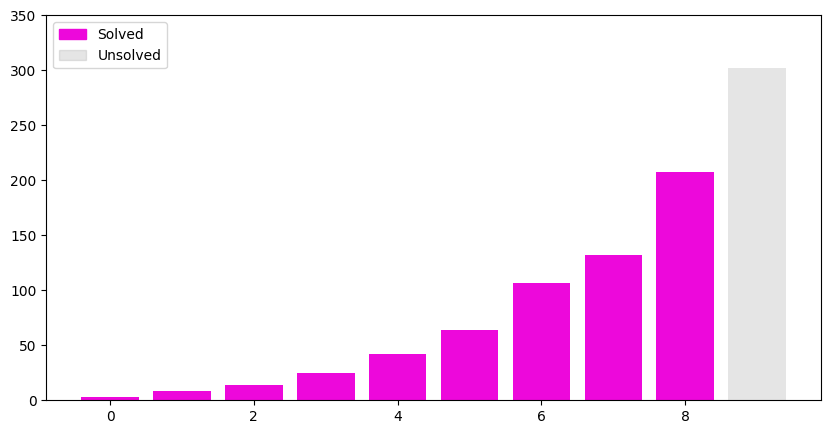

In [ ]:
ROTATION = True
SYMMETRY_BREAKING = True

csv_with_rotation_paths.append(solve(ROTATION, SYMMETRY_BREAKING, BEST_ENCODER))

## Comparison

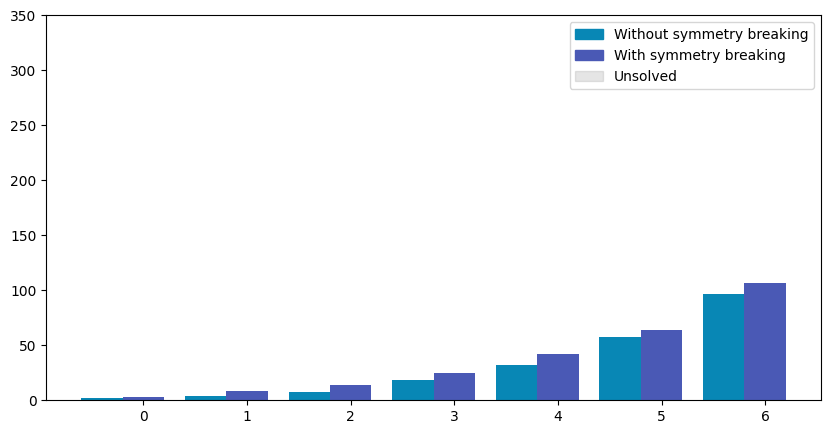

In [ ]:
utils.display_times_comparison(csv_with_rotation_paths, ['Without symmetry breaking', 'With symmetry breaking', 'Unsolved'], NUMBER_OF_INSTANCES)